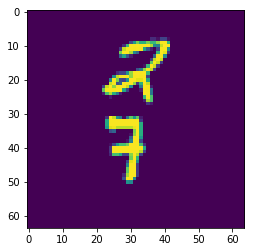

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
import os.path
import numpy as np
import sys
sys.path.insert(0, './')
from utils import plot_mats
from pgpnn import ImageSplitter, PredictiveGatingPyramid

file_name = 'mnist_test_seq.npy'
url = 'http://www.cs.toronto.edu/~nitish/unsupervised_video/mnist_test_seq.npy'

if not os.path.isfile(file_name):
    print("could not find dataset: download it..")
    urllib.request.urlretrieve(url, file_name)
    print("download complete")

# Moving Mnist: 10.000 sequences of length 20 showing 2 digits moving in 64x64
moving_mnist = np.load(file_name) # shape: 20,10000,64,64
moving_mnist = np.rollaxis(moving_mnist, 1) # --> 10000,20,64,64

plt.imshow(moving_mnist[0,0])
plt.show()

In [ ]:
model = PredictiveGatingPyramid(depth=2, modelname='test_pgp')
history = model.train(
    moving_mnist,
    epochs=200,
    learningRate=0.00000001,
    save_results=True,
    load_stages=True)

plt.plot(range(0, len(history)), history)
plt.show()

[CONSTRUCT LAYER 1]
	pre-loading weights for Layer 1
[CONSTRUCT LAYER 2]
	pre-loading weights for Layer 2
Training: Epoch: 001/200 cost: 662.908777574 time: 23.15
Training: Epoch: 002/200 cost: 662.909524357 time: 21.75
Training: Epoch: 003/200 cost: 662.910500919 time: 21.70
Training: Epoch: 004/200 cost: 662.911879596 time: 21.66
Training: Epoch: 005/200 cost: 662.913143382 time: 21.90
Training: Epoch: 006/200 cost: 662.913488051 time: 21.49
Training: Epoch: 007/200 cost: 662.914924173 time: 21.65
Training: Epoch: 008/200 cost: 662.916417739 time: 21.46
Training: Epoch: 009/200 cost: 662.917164522 time: 21.78
Training: Epoch: 010/200 cost: 662.918887868 time: 21.69
Training: Epoch: 011/200 cost: 662.919749540 time: 21.76
Training: Epoch: 012/200 cost: 662.921300551 time: 21.72
Training: Epoch: 013/200 cost: 662.922047335 time: 21.88
Training: Epoch: 014/200 cost: 662.923655790 time: 21.72
Training: Epoch: 015/200 cost: 662.925666360 time: 21.72
Training: Epoch: 016/200 cost: 662.9270

Training: Epoch: 143/200 cost: 663.073874081 time: 21.78
Training: Epoch: 144/200 cost: 663.075539982 time: 21.71
Training: Epoch: 145/200 cost: 663.076803768 time: 21.83
Training: Epoch: 146/200 cost: 663.078182445 time: 21.72
Training: Epoch: 147/200 cost: 663.079044118 time: 21.56
Training: Epoch: 148/200 cost: 663.079790901 time: 21.63
Training: Epoch: 149/200 cost: 663.081227022 time: 21.86
Training: Epoch: 150/200 cost: 663.082663143 time: 21.59
Training: Epoch: 151/200 cost: 663.083409926 time: 21.55
Training: Epoch: 152/200 cost: 663.084501379 time: 21.62
Training: Epoch: 153/200 cost: 663.085190717 time: 21.89
Training: Epoch: 154/200 cost: 663.086454504 time: 21.67
Training: Epoch: 155/200 cost: 663.086971507 time: 21.73
Training: Epoch: 156/200 cost: 663.088292739 time: 21.59
Training: Epoch: 157/200 cost: 663.089499081 time: 21.93
Training: Epoch: 158/200 cost: 663.090475643 time: 21.68
Training: Epoch: 159/200 cost: 663.091337316 time: 21.67
Training: Epoch: 160/200 cost: 

In [ ]:
a = moving_mnist[0,0]
b = moving_mnist[0,1]
c = moving_mnist[0,2]
im = model.predict(a,b,c)

In [ ]:
fig = plt.figure(figsize=(16,4))
fig.add_subplot(141).imshow(a)
fig.add_subplot(142).imshow(b)
fig.add_subplot(143).imshow(c)
fig.add_subplot(144).imshow(im)

In [ ]:
# print(model.V1_np.shape)
# print(model.U1_np.shape)

# import matplotlib.pyplot as plt
# import pylab

# # function copied from the original code
# def dispims(M, height, width, border=0, bordercolor=0.0, layout=None, **kwargs):
#     from pylab import cm, ceil
#     numimages = M.shape[1]
#     if layout is None:
#         n0 = int(np.ceil(np.sqrt(numimages)))
#         n1 = int(np.ceil(np.sqrt(numimages)))
#     else:
#         n0, n1 = layout
#     im = bordercolor * np.ones(((height+border)*n0+border,(width+border)*n1+border),dtype='<f8')
#     for i in range(n0):
#         for j in range(n1):
#             if i*n1+j < M.shape[1]:
#                 im[i*(height+border)+border:(i+1)*(height+border)+border,
#                    j*(width+border)+border :(j+1)*(width+border)+border] = np.vstack((
#                             np.hstack((np.reshape(M[:,i*n1+j],(height, width)),
#                                    bordercolor*np.ones((height,border),dtype=float))),
#                             bordercolor*np.ones((border,width+border),dtype=float)
#                             ))
    
#     return im


# I = dispims(model.U1_np, 64, 64, 10)
# J = dispims(model.V1_np, 64, 64, 10)

# fig = plt.figure(figsize=(16,8))
# fig.add_subplot(121).imshow(I)
# fig.add_subplot(122).imshow(J)

# plt.show()